In [2]:
import math,copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Logistic Regression

Logistic regression is an algorithm in the regression family that helps us predict binary outcomes, or simply put, "yes" or "no" values, based on some input features (which can be continuous or binary themselves).

For example, imagine you want to predict whether you can play golf tomorrow. This decision depends on various factors such as the weather being right, having enough free time, and having the budget or money. If all of these factors are favorable, then you can go play golf. However, if you don't have time, you can't go, or if you don't have money, you might still be able to go if other conditions are met.

Logistic regression helps us in predicting these "yes" or "no" outcomes based on the input factors. These types of problems are known as classification problems.

Now, applying linear regression to these problems won't work as it provides a continuous set of values as the output, and we need our output to be 1 or 0 (meaning yes or no). We need to somehow convert this continuous value to a binary value, and here we use the sigmoid function to achieve this.

#### Sigmoid Function

The sigmoid function, often denoted as $ \sigma(Z) $, is defined as:

$$ \sigma(Z) = \frac{1}{1 + e^{-Z}} $$

Where:
- $ e $ is the base of the natural logarithm
- $ Z $ is the input to the function

The sigmoid function, a special case of the logistic function (when $ L = 1, k = 1, x_0 = 0 $, search online for more info), maps any real-valued number to a value between 0 and 1. It produces the probability of an input being 1 (meaning likely to occur) or 0 (meaning not). Now, say there are two different possibilities and the probability of the first one is $ \sigma_{1} = \text{p} $, then the probability of the second outcome will be $ \sigma_{2} = 1 - \text{p} $.

After predicting a value between 0 and 1, we generally use a threshold point or a decision boundary to predict whether a given input is classified as 1 or 0. In most cases, this threshold value is set to 0.5. If the sigmoid function returns a value greater than 0.5, we predict 1; otherwise, we predict 0.

`Decision Boundary`: It is nothing but a line that separates two clusters of data, where one side is used to predict true and the other false.


Here, $ Z = W \cdot X + b $, making the sigmoid function:

$$ \sigma(Z) = \frac{1}{1 + e^{-(W \cdot X + b)}} $$

which can also be written as:

$$ f_{(W,b)} = \sigma(W \cdot X + b) $$

So, here we will use this function to compute our output from our normal $ F_{W,b} $ equation.

Additionally, we cannot use the cost function from linear regression here, as the cost function there yields a convex function, meaning it only has one minimum, making it the global minimum. However, if we try plugging in our current $ F_{W,b} $ into that old cost function equation, we will get a non-convex function, meaning it will have multiple local minima. This makes it difficult for gradient descent algorithms to find the optimal $ W $ and $ b $ values, as they can get stuck in one of these minima (where the slope = 0).

So, here we come up with the logistic loss function.

The `logistic loss function`, also known as the `binary cross-entropy loss` or `negative log-likelihood`, is defined as:

$$ 
J(W, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(F_{W,b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - F_{W,b}(x^{(i)})) \right] 
$$

Where:
- $ m $ is the number of training examples
- $ y^{(i)} $ is the actual label for the $ i $-th training example
- $ F_{W,b}(x^{(i)}) $ is the predicted probability for the $ i $-th training example, which is computed using the sigmoid function:
  $$
  F_{W,b}(x) = \sigma(W \cdot X + b) = \frac{1}{1 + e^{-(W \cdot X + b)}}
  $$
- $ \log $ is the natural logarithm

This loss function measures the performance of a classification model whose output is a probability value between 0 and 1. The goal of logistic regression is to minimize this loss function to find the optimal parameters $ W $ and $ b $.

Now, let's break this function down:

Mainly we need to understand what this does:
$$
l_i = - y^{(i)} \log(F_{W,b}(x^{i})) - (1 - y^{(i)}) \log(1 - F_{W,b}(x^{i})) 
$$

The above function is itself made from the combination of two terms:
1. **First Term**:
   $$
   - y^{(i)} \log(F_{W,b}(x^{(i)}))
   $$
   This term penalizes the model when the actual label $ y^{(i)} $ is 1 and the predicted probability $ F_{W,b}(x^{(i)}) $ is low. The higher the predicted probability for the true class, the lower the loss.

2. **Second Term**:
   $$
   - (1 - y^{(i)}) \log(1 - F_{W,b}(x^{(i)}))
   $$
   This term penalizes the model when the actual label $ y^{(i)} $ is 0 and the predicted probability $ F_{W,b}(x^{(i)}) $ is high. The higher the predicted probability for the false class, the higher the loss.

By combining these two terms, the logistic loss function ensures that the model is penalized appropriately for incorrect predictions while being rewarded for correct predictions. The function is designed to be minimized, meaning that the lower the loss, the better the model's predictions align with the actual labels.

Now, here I won't be going into the details of how this works, and why this though I will in pen and paper. So, let's begin with the code implementation of logistic regression.


Now, let's say our problem is to classify if a student passed or not.(such problems are called classification problems)


In [3]:
X =np.array( [[1,20],
     [2,30],
     [4,55],
     [6,70],
     [4,90]])

y = np.array([0,0,0,1,1])



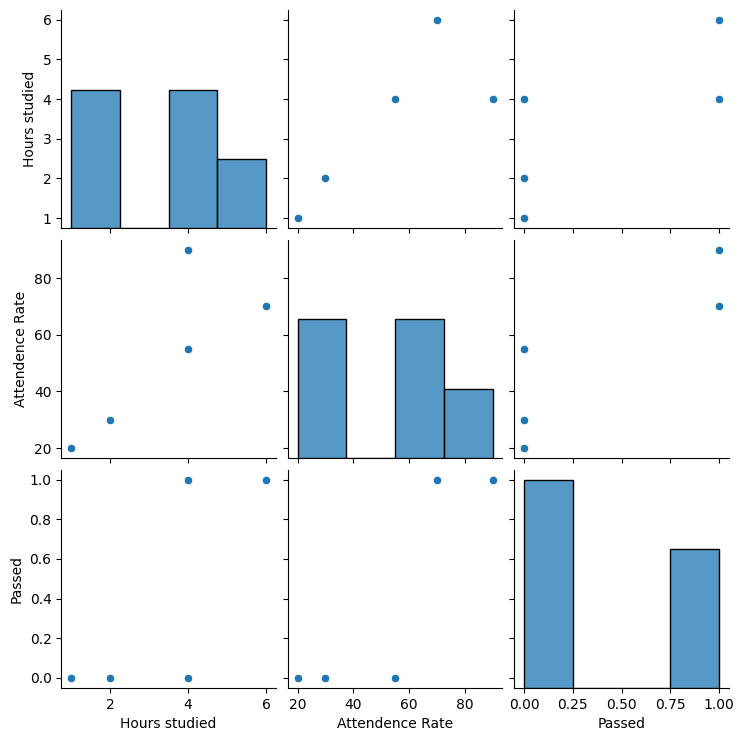

In [4]:
#Let's Vizualize the Data

dataset = pd.DataFrame(X)
dataset['Passed'] = y
dataset.columns = ['Hours studied','Attendence Rate','Passed']

sns.pairplot(dataset)

Look at the "Passed vs. Hours Studied" plot; it shows that a student who studies for more than 3 hours passes. Similarly, the "Passed vs. Attendance Rate" plot shows that students with high attendance pass.

So, if our model is given a new input, say 9 hours and an 87% attendance rate, it should predict that the student will pass. Similarly, if our model is given 2 hours and a 67% attendance rate, it should predict that the student will fail.

Additionally, let's visualize how the sigmoid function looks and predicts by only taking "Passed vs. Hours Studied."

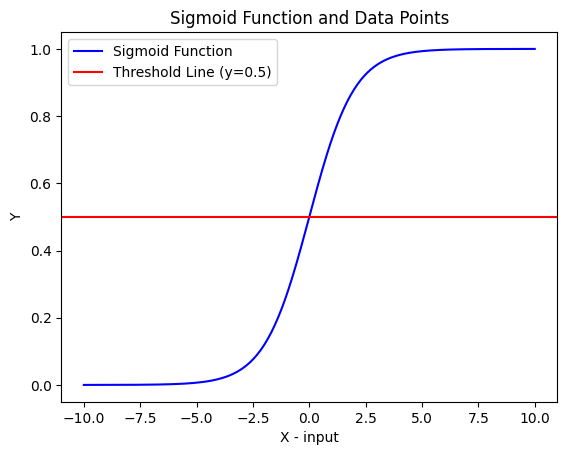

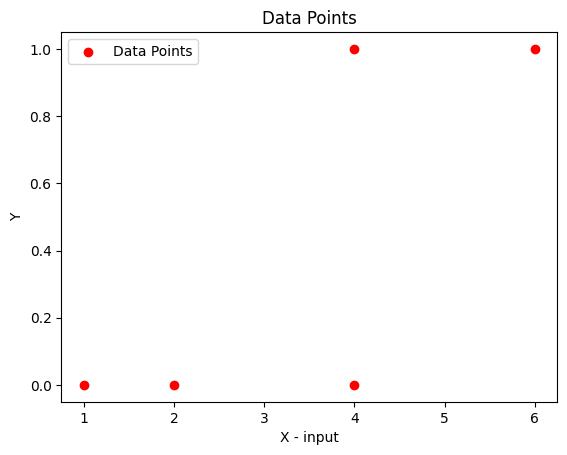

In [5]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate Y values for the range of X values
x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)


# Plot the sigmoid function
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')

# Plot the threshold line at y = 0.5
plt.axhline(y=0.5, color='red', linestyle='-', label='Threshold Line (y=0.5)')

# Add labels and legend
plt.xlabel('X - input')
plt.ylabel('Y')
plt.title('Sigmoid Function and Data Points')
plt.legend()

# Show the plot
plt.show()

X_data = np.array([1, 2, 4, 6, 4]).reshape(-1, 1)
Y_data = np.array([0, 0, 0, 1, 1])
plt.scatter(X_data, Y_data, label='Data Points', color='red')

# Add labels and legend
plt.xlabel('X - input')
plt.ylabel('Y')
plt.title('Data Points')
plt.legend()

# Show the plot
plt.show()

#### As you can vizulaize above if we find the correct W and b parameter our sigmoid function can fit this data, and be able to predict well, now sigmoid function yeilds a value in between 0 and 1 and form the sigmoid graph if we use a threashold for 0.5, value above this will be calssified as true or 1 and below this as 0 or flase.

### Now,let's start with the implemntation of our model function, or simply the function which generates the yhat values (makes predictions).

In [6]:
def sigmoid_func(Z):
    """
    This function computes the probability of a given training example being true (1) or false (0).

    Args:
        Z (scalar): Computed linear prediction for a single training example.

    Returns:
        p (scalar): Probability.
    """
    return 1 / (1 + np.exp(-Z))



def compute_model_output_logistic(X, W, b):
    """
    This function takes the input training data and computes the output (or simply makes predictions).
    
    Args: 
        X (ndarray): Training data.
        W (ndarray): Slopes or coefficients.
        b (scalar): Bias or intercept.
        
    Returns:
        yhat (ndarray): Predictions.
    """

    m = X.shape[0]
    yhat = np.zeros(m)

    Z = np.dot(X, W) + b #compute the linear output
    
    for i in range(m):
        yhat[i] = sigmoid_func(Z[i])

    return yhat


Predictions made by our model :  [0.98522597 0.99816706 0.99998987 0.99999959 0.99999999]
Prediction made by our model (binary):  [1, 1, 1, 1, 1]


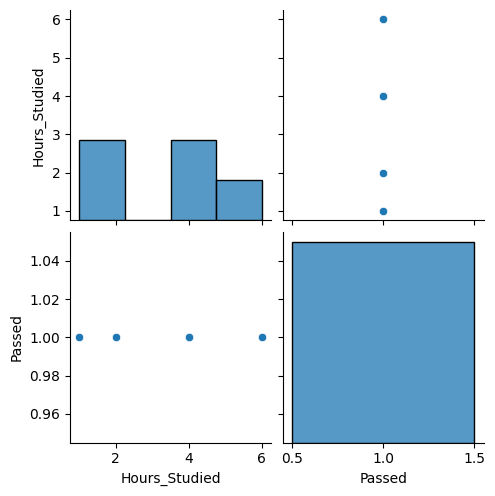

In [7]:
#Let's Compute the prediction made by our model for some random W and b

W = [0.1,0.2]
b = 0.1
yhat = compute_model_output_logistic(X,W,b)
print("Predictions made by our model : ",yhat)

y_pred = []
for i in range(yhat.shape[0]):
    if yhat[i] >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print("Prediction made by our model (binary): ",y_pred)
dataset_predicted = pd.DataFrame(X[:,0])
dataset_predicted['Passed'] = y_pred
dataset_predicted.columns = ["Hours_Studied","Passed"]

sns.pairplot(dataset_predicted)

#### Currently, our model predicts all values to be true, which is obviously incorrect. Let's see Finding the Loss and running gradient descent to find the correct weights will affect our model's output.

#### Now, that we have implemented the Model Function let's proceed to implementing the Loss Function.

In [8]:
def compute_logistic_loss(X, Y, W, b, make_predictions):
    """
    This function computes the loss on a specific training example.

    Args:
        X (ndarray): Training input data.
        Y (ndarray): Target data.
        W (ndarray): Slopes or coefficients.
        b (scalar): Intercept or bias.
        make_predictions (function): Function to make predictions.
    
    Returns:
        total_loss (scalar): Computed loss.
    """
    
    yhat = make_predictions(X, W, b)
    m = yhat.shape[0]
    total_loss = 0
    
    for i in range(m):
        total_loss += ( (-Y[i] * np.log(yhat[i])) - ((1 - Y[i]) * np.log(1 - yhat[i])) ) #Logistic Loss
    
    total_loss /= m
    return total_loss


In [9]:
#Let's compute the Loss
print(compute_logistic_loss(X,y,W,b,compute_model_output_logistic))

4.4033458855424294


We have successfully implemented the model output and logistic loss. The gradient descent algorithm remains structurally the same as in linear regression. By taking the derivative of the loss function, we arrive at a similar update rule.

In [10]:
def compute_gradient_logistic(X,Y,W,b):
    """
    This function computes the Gradient of cost fuction
    for a given set of w and b values.

    Args:
        X (ndarray) : Training Input values
        Y (ndarray) : Target value or (output values for the input)    
        W (ndarray) : slope or wrights for the input parameter
        b (scalar) : intercept or bias parameter

    Returns:
        dj_dw (ndarray) : gradient when partially diffrentiated wrt w
        dj_db (ndarray) : gradient when partially diffrentiated wrt b
    """
        
    m,n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.0
    yhat = compute_model_output_logistic(X,W,b)
    for i in range(m):
        err_i = yhat[i] - Y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i 

    dj_dw /= m
    dj_db /= m

    return dj_dw,dj_db



In [11]:
def gradient_descent(X, Y, W_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    This Function performs the Gradient descent algorithms i.e it updates the 
    values of w and b to reach the optimal values.

    Args:
        X (ndarray) : Training Input values
        Y (ndarray) : Target value or (output values for the input)    
        W_int (ndarray) : slope parameter (initial value)
        b_int (scalar) : intercept or bias parameter (initial value)
        alpha (scalar) : Learning Rate
        num_iters (scalar) : number of iterations
        compute_loss_function (function) : function to call cost function ro MSE
        gradient_function ( function) : function to call compute_gradient function

    Returns:
        W (ndarray): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b]
    """

    W = copy.deepcopy(W_in)
    b = b_in

    Jwb_hist = []  # stores how the value of J(w,b) changes over time
    Wb_hist = []  #stores the value of W,b as it changes over time
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, Y, W, b)

        # updating the parameters
        b = b - alpha * dj_db
        W = W - alpha * dj_dw

        # saving cost J at each iteration
        if i < 100000:  # Limiting history to save memory
            Jwb_hist.append(cost_function(X, Y, W, b,compute_model_output_logistic))
            Wb_hist.append((W,b))


        # Print cost every at about intervals 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {Jwb_hist[-1]:0.2e} ", 
                  f"dj_dw: {dj_dw} ", 
                  f"dj_db: {dj_db: 0.3e}  ", 
                  f"W: {W} ", 
                  f"b: {b: 0.5e}")
            
    return W, b, Jwb_hist,Wb_hist



Iteration    0: Cost 6.44e+00  dj_dw: [ 1.39973404 20.99478117]  dj_db:  5.997e-01   W: [0.19860027 0.27900522]  b:  4.99400e-01
Iteration 10000: Cost 4.92e-01  dj_dw: [-0.0017398  -0.00195308]  dj_db:  1.303e-01   W: [-0.09318814  0.03058578]  b: -1.16090e+00
Iteration 20000: Cost 3.73e-01  dj_dw: [-0.00566604 -0.00105515]  dj_db:  9.056e-02   W: [-0.04473341  0.04456651]  b: -2.24380e+00
Iteration 30000: Cost 3.10e-01  dj_dw: [-0.00484989 -0.00075168]  dj_db:  6.892e-02   W: [0.00811279 0.0534177 ]  b: -3.03119e+00
Iteration 40000: Cost 2.71e-01  dj_dw: [-0.00413091 -0.00058592]  dj_db:  5.591e-02   W: [0.05279722 0.06003666]  b: -3.65034e+00
Iteration 50000: Cost 2.45e-01  dj_dw: [-0.00363392 -0.00048065]  dj_db:  4.740e-02   W: [0.09147482 0.06533354]  b: -4.16415e+00
Iteration 60000: Cost 2.25e-01  dj_dw: [-0.00327495 -0.00040876]  dj_db:  4.144e-02   W: [0.12593088 0.06975944]  b: -4.60670e+00
Iteration 70000: Cost 2.10e-01  dj_dw: [-0.00300111 -0.00035714]  dj_db:  3.705e-02   W

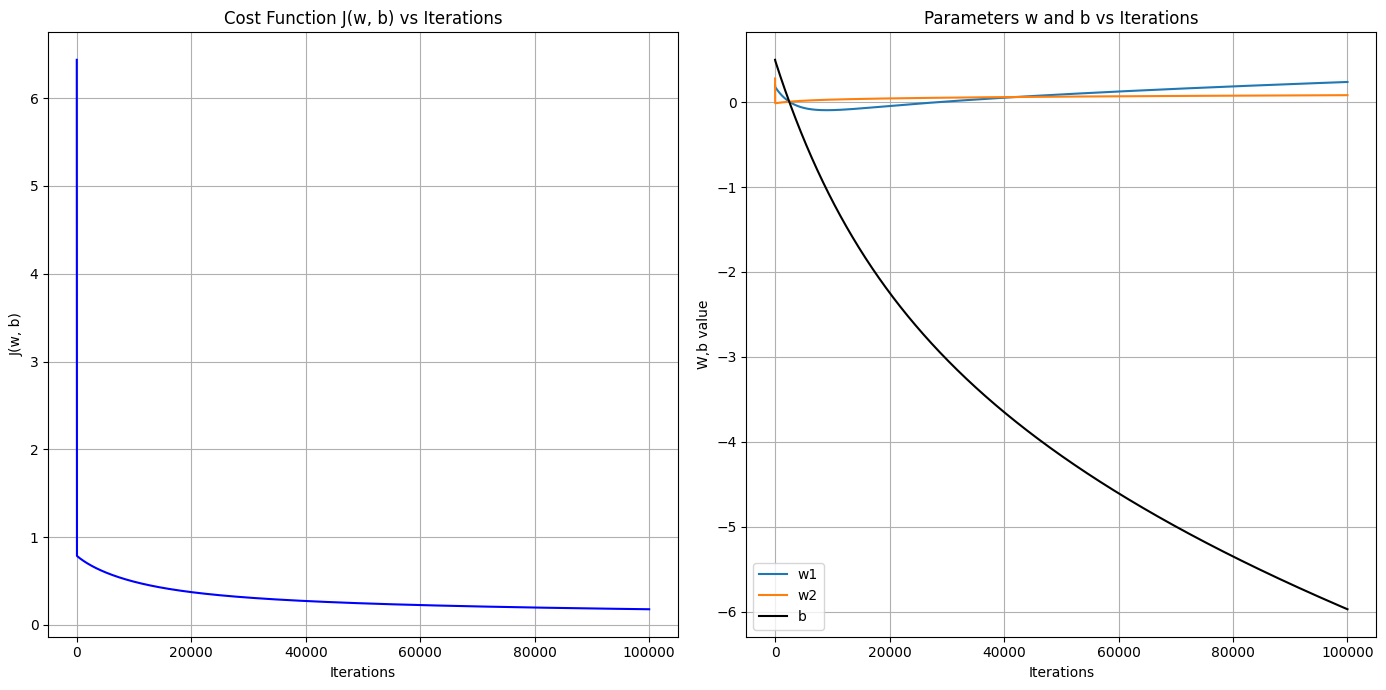

In [21]:
#Now let's run the gradient descent algorithm.
W_init = [0.2,0.3]
b_init = 0.5
iterations = 100000
alpha = 1.0e-3
W_final,b_final,Jwb_history,Wb_history = gradient_descent(X,y,W_init,b_init,alpha,iterations,compute_logistic_loss,compute_gradient_logistic)

print("Initial Values of W and b:", W_init,"\n",b_init)
print("Final Values of W and b:", W_final,"\n",b_final)

#Don't print these value for iteration >1000
#print("History of Jwb: ",Jwb_history)
#print("History of wb: ",Wb_history)

# Plot J(w, b) vs iterations
plt.figure(figsize=(14, 7))

# Plot cost function J(w, b) vs iterations
plt.subplot(1, 2, 1)
plt.plot(range(len(Jwb_history)), Jwb_history, color='blue')
plt.title('Cost Function J(w, b) vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('J(w, b)')
plt.grid(True)

# Plot w and b vs iterations
plt.subplot(1, 2, 2)
for i in range(W_final.shape[0]):
    plt.plot(range(len(Wb_history)), [p[0][i] for p in Wb_history], label=f'w{i+1}', color=f'C{i}')
plt.plot(range(len(Wb_history)), [p[1] for p in Wb_history], label='b', color='black')
plt.title('Parameters w and b vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('W,b value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [22]:
#Now that we have the final Values of the W and b parameter let's test our model

yhat_test = compute_model_output_logistic(X,W_final,b_final)
print(yhat_test)
yhat_pred = []

#We have to do this to get the final prediction values.
for i in range(yhat_test.shape[0]):
    if (yhat_test[i] > 0.5):
        yhat_pred.append(1)
    else:
        yhat_pred.append(0)

print("Predictions: ", yhat_pred)
print("Actual Values: ",y)


[0.01662887 0.04679244 0.38486853 0.77709734 0.91886378]
Predictions:  [0, 0, 0, 1, 1]
Actual Values:  [0 0 0 1 1]


In summary, we have completed the implementation of logistic regression and understood its basic concept of how it works. Now, I know you might have a lot of questions, like why did we use the sigmoid function specifically? What are these $L$, $K$, and $x_0$ values? How does the loss formula compute the error, and how does it penalize the model for making incorrect predictions?

#### I will be diving deep into this on `pen and paper`.
